In [12]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np 
from matplotlib.colors import ListedColormap

In [2]:
#Load the Iris dataset
iris = load_iris() 
X = iris.data
y = iris.target
# # Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Initialize the Random Forest Classifier 
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) 
# Train the model on the training data 
random_forest.fit(X_train, y_train) # Make predictions on the test set 
y_pred = random_forest.predict(X_test)

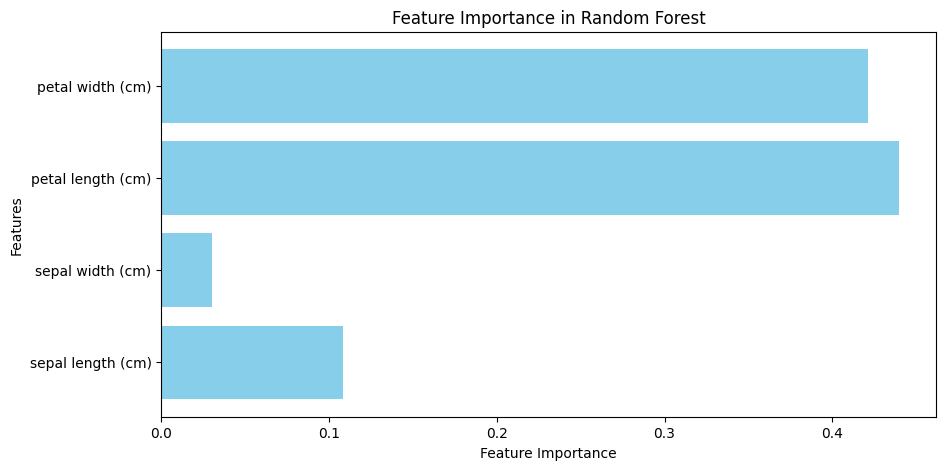

In [6]:
# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred) 
# Plot the feature importance 
feature_importance = random_forest.feature_importances_ 
features = iris.feature_names 
plt.figure(figsize=(10, 5)) 
plt.barh(features, feature_importance, color="skyblue") 
plt.xlabel("Feature Importance") 
plt.ylabel("Features") 
plt.title("Feature Importance in Random Forest") 
plt.show() 

In [7]:
# Scatter plot of two features with decision regions 
X_plot = X_train[:, :2] # Only two features for 2D visualization 
y_plot = y_train 
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42) 
forest_clf.fit(X_plot, y_plot)

RandomForestClassifier(n_estimators=10, random_state=42)

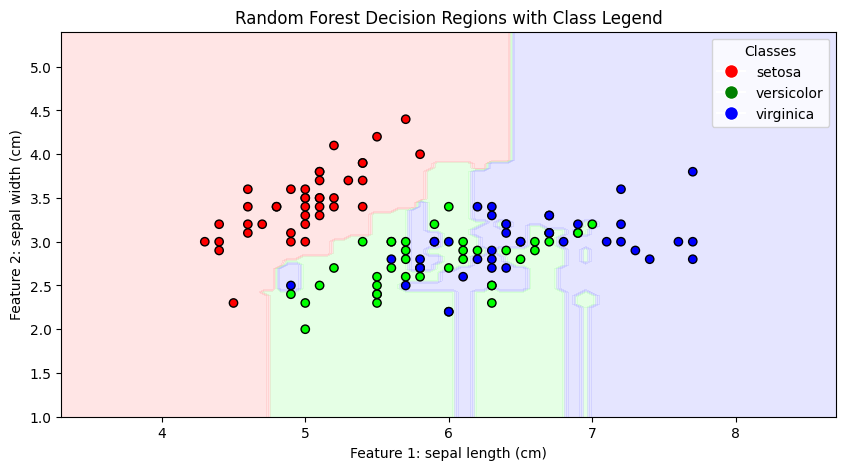

In [10]:
#Create a mesh grid 
x1, x2 = np.meshgrid(np.linspace(X_plot[:, 0].min() -1, X_plot[:, 0].max() + 1, 100),
                     np.linspace(X_plot[:, 1].min() -1, X_plot[:, 1].max() + 1, 100)) 
grid = np.c_[x1.ravel(), x2.ravel()] 
preds = forest_clf.predict(grid).reshape(x1.shape) 
#Plot decision boundaries 
plt.figure(figsize=(10, 5)) 
cmap_background = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"]) 
cmap_points = ListedColormap(["#FF0000", "#00FF00", "#0000FF"]) 
plt.contourf(x1, x2, preds, alpha=0.3, cmap=cmap_background) 
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=cmap_points, edgecolor="k") 
#Adding the legend for the classes 
class_labels = iris.target_names 
plt.legend(handles=[ 
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=class_labels[0]), 
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label=class_labels[1]), 
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=class_labels[2]) 
], title="Classes", loc="upper right") 
plt.xlabel("Feature 1: " + features[0]) 
plt.ylabel("Feature 2: " + features[1]) 
plt.title("Random Forest Decision Regions with Class Legend") 
plt.show() 

In [11]:
# Display classification report and accuracy 
classification_report_output = classification_report(y_test, y_pred, target_names=iris.target_names) 
classification_report_output, accuracy

('              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        10\n  versicolor       1.00      1.00      1.00         9\n   virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n',
 1.0)